In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

Importing dataset into dataframe

In [ ]:
df = pd.read_csv('Zoo.csv')

In [ ]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Checking for null values

In [ ]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

splitting the data into training and testing split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.loc[:, df.columns!='animal name']

In [ ]:
y = df['animal name']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

Now we will be training the model on training data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

We will be predicting  using testing dataset

In [ ]:
# Scores for training and testing data
kn.score(xtrain, ytrain)


0.325

In [ ]:
kn.score(xtest, ytest)

0.0

We will plot different k values along with accuracy to pick the one with the best accuracy value

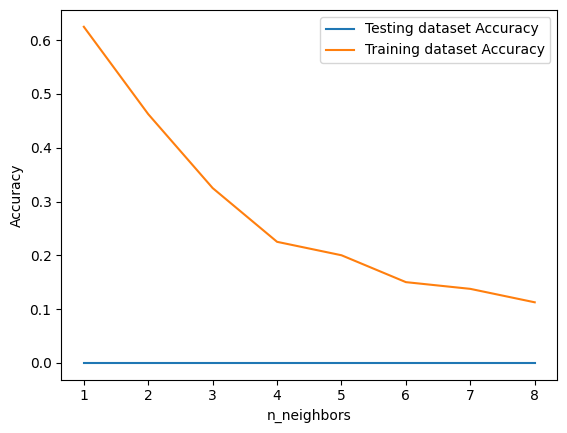

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(xtrain, ytrain)
    test_accuracy[i] = knn.score(xtest, ytest)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

from the above plot we can conclude that nof neighbours value must be 1

We will be plotting the boundaries of classification

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# We will convert labelsinto number
le = LabelEncoder()

In [ ]:
 ytrain = le.fit_transform(ytrain)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

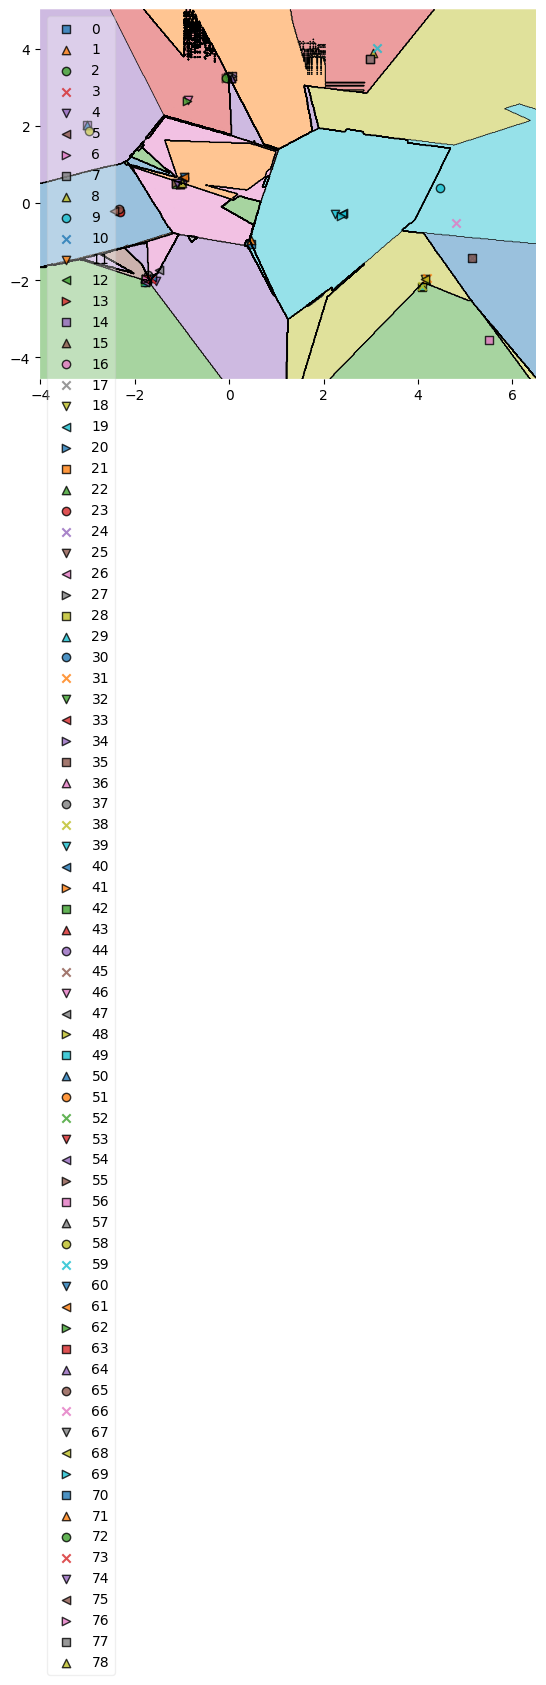

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)# We  will be rducig features using PCA for ease of plotting
xtrain2 = pca.fit_transform(xtrain)
kclf = KNeighborsClassifier(n_neighbors=5)
kclf.fit(xtrain2,ytrain)
plot_decision_regions(xtrain2, ytrain, clf=kclf, legend=2)